# EMAIL SPAM DETECTION

**Import the Necessary Packages**

In [1]:
import nltk

In [2]:
messages=[line.rstrip() for line in open('SMSSpamCollection.csv')]

In [3]:
print(len(messages))

5574


In [4]:
type(messages)

list

In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,mess in enumerate(messages[:10]):
    print(mess_no,mess)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
import pandas as pd

In [8]:
mess_data=pd.read_csv('SMSSpamCollection.csv',sep='\t',names=['Labels','Message'])

In [9]:
mess_data.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
mess_data.describe()

,Labels,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
mess_data.groupby('Labels').describe().transpose()

Labels                             ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Labels                                                       spam  
Message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [12]:
mess_data.groupby('Labels').describe()

Message                                                               
         count unique                                                top freq
Labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [13]:
mess_data['Length']=mess_data['Message'].apply(len)

In [14]:
mess_data.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA VISUALIZATION

<Axes: ylabel='Frequency'>

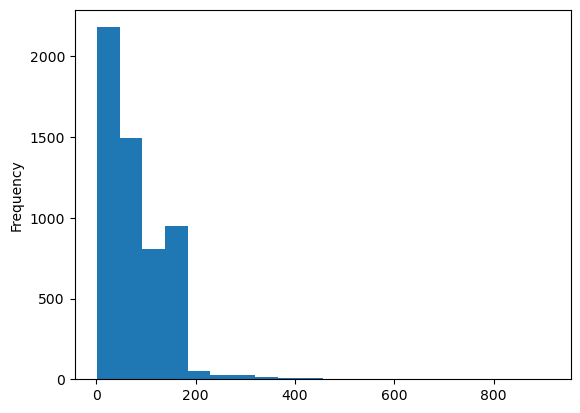

In [16]:
mess_data['Length'].plot(kind='hist',bins=20)

In [17]:
mess_data['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [18]:
mess_data[mess_data['Length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [19]:
mess_data[mess_data['Length']>780]['Message'].iloc[1]

"The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed."

<Axes: xlabel='Length', ylabel='Count'>

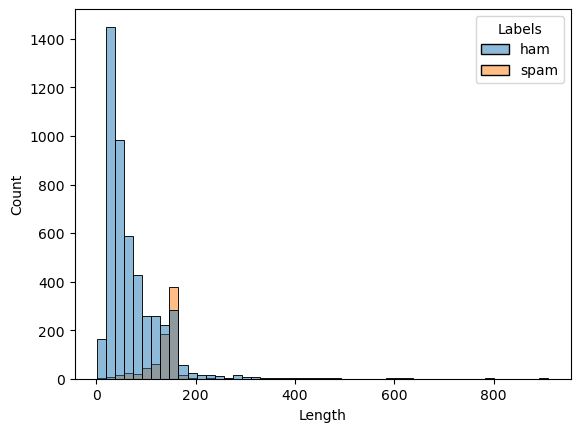

In [20]:
import warnings
warnings.filterwarnings('ignore')
sns.histplot(data=mess_data,x='Length',hue='Labels',bins=50)

<Figure size 1000x1000 with 0 Axes>

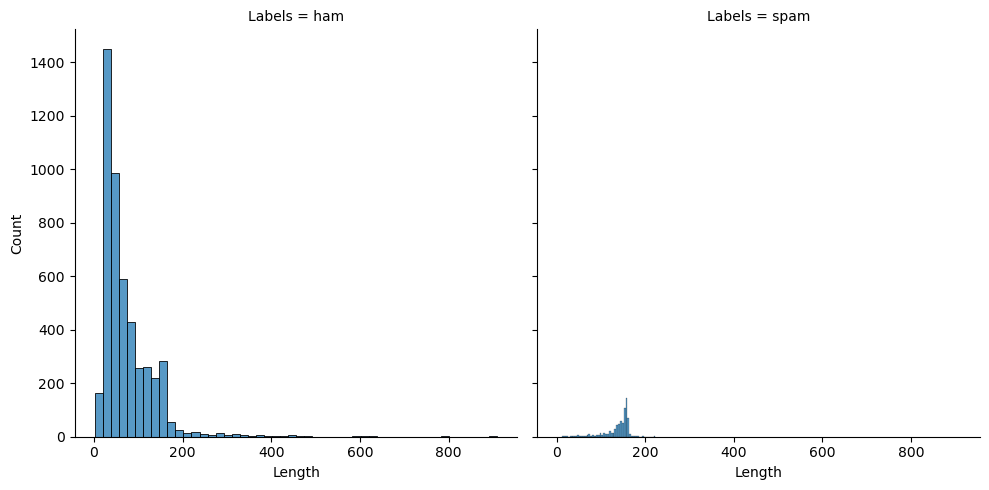

In [21]:
plt.figure(figsize=(10,10))
g=sns.FacetGrid(data=mess_data,col='Labels',height=5)
g.map(sns.histplot,'Length',bins=50)
plt.show()

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

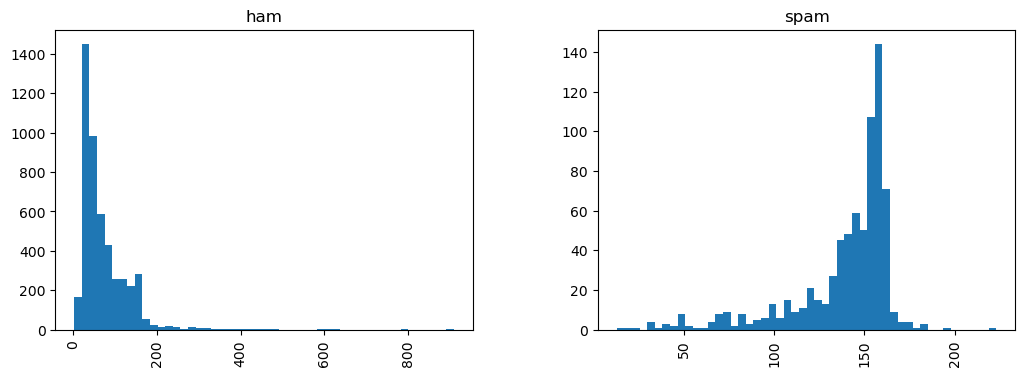

In [22]:
mess_data.hist(column='Length', by='Labels', bins=50,figsize=(12,4))

# DATA PREPROCESSING

In [23]:
import string

In [24]:
mytext='Hello Welcome! This is Jupyter Notebook; You will work more...'

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
nonpunc=[c for c in mytext if c not in string.punctuation]

In [27]:
print(nonpunc)

['H', 'e', 'l', 'l', 'o', ' ', 'W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'J', 'u', 'p', 'y', 't', 'e', 'r', ' ', 'N', 'o', 't', 'e', 'b', 'o', 'o', 'k', ' ', 'Y', 'o', 'u', ' ', 'w', 'i', 'l', 'l', ' ', 'w', 'o', 'r', 'k', ' ', 'm', 'o', 'r', 'e']


In [28]:
mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [32]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess#it and has were removed

['Sample', 'message', 'Notice', 'punctuation']

In [34]:
def text_process(mess):
    no_punc=[c for c in mess if c not in string.punctuation]
    abc=''.join(no_punc)
    return [word for word in abc.split() if word.lower() not in stopwords.words('english')]

In [35]:
mess_data.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
mess_data['Message'].apply(lambda x:text_process(x))

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [37]:
mess_data.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# DATA TRANSFORMATION

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(mess_data['Message'])

In [40]:
bow_transformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [41]:
len(bow_transformer.vocabulary_)

11425

In [42]:
message4 = mess_data['Message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [43]:
bow4=bow_transformer.transform([message4])

In [44]:
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [45]:
print(bow_transformer.get_feature_names_out()[4068])
print(bow_transformer.get_feature_names_out()[423])

U
2


In [46]:
messages_bow = bow_transformer.transform(mess_data['Message'])

In [47]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [48]:
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Amount of Non-Zero occurences:  50548


In [49]:
print(mess_data.iloc[5571])

Labels                            ham
Message    Rofl. Its true to its name
Length                             26
Name: 5571, dtype: object


In [50]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [52]:
print(tfidf_transformer.idf_[10698])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['k']])

3.2800524267409408
6.447634957221591


In [53]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [54]:
bow_transformer.vocabulary_['u']

10698

In [55]:
messages_tfidf[0]

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, mess_data['Labels'])

In [57]:
print('predicted:', spam_detect_model.predict(tfidf4))
print('expected:', mess_data.Labels[3])

predicted: ['ham']
expected: ham


In [58]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


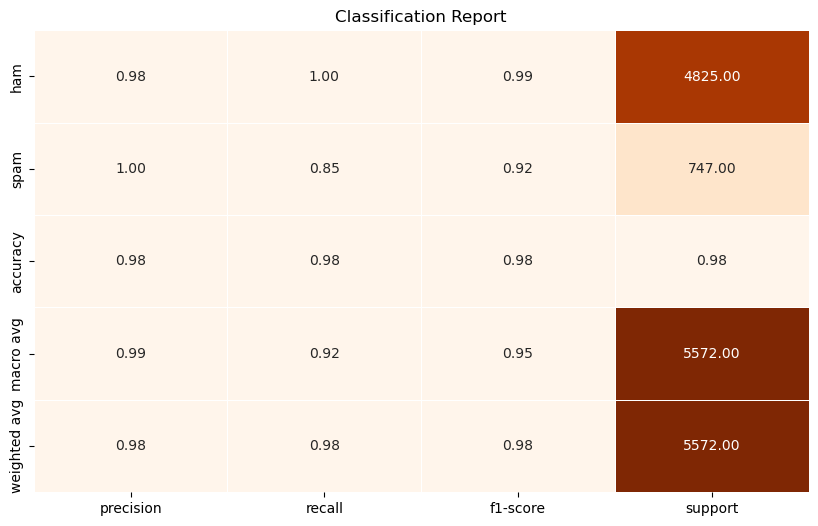

In [59]:
from sklearn.metrics import classification_report
report_dict = classification_report(mess_data['Labels'], all_predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Oranges', cbar=False, fmt='.2f',linewidths=0.4,linecolor='white')
plt.title('Classification Report')
plt.show()

# MODEL TRAINING

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
msg_train, msg_test, label_train, label_test = train_test_split(mess_data['Message'], mess_data['Labels'], test_size=0.30, random_state=42)

In [62]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                  ('tfid',TfidfTransformer()),('model',MultinomialNB())])

In [65]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000288D7E4FA60>)),
                ('tfid', TfidfTransformer()), ('model', MultinomialNB())])

In [66]:
predictions=pipeline.predict(msg_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

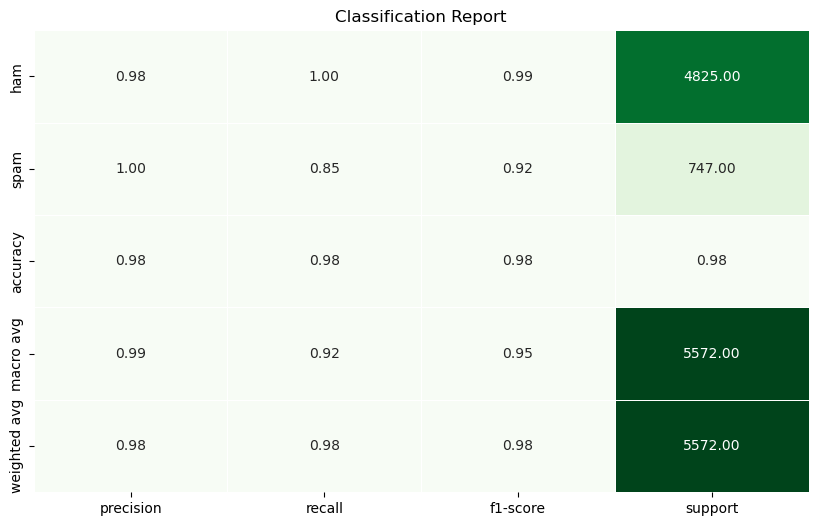

In [68]:
final_report_dict = classification_report(label_test,predictions,output_dict=True)
final_report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Greens', cbar=False, fmt='.2f',linewidths=0.4,linecolor='white')
plt.title('Classification Report')
plt.show()

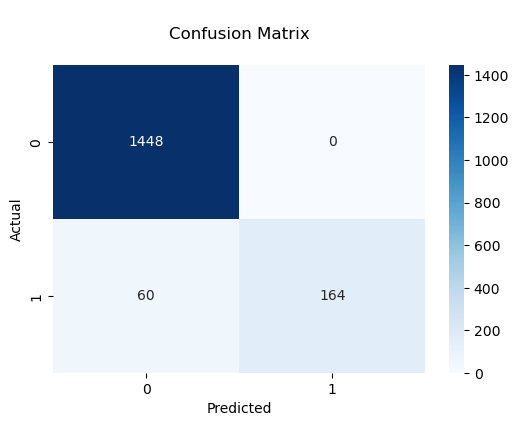

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(label_test,predictions), annot=True, fmt='d', cmap='Blues')
plt.title('\nConfusion Matrix\n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### DONE BY

MOHAMED SAMIR M